<a href="https://colab.research.google.com/github/abhinav-syl/Investing/blob/main/Investing_com_Scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Commodity prices from [Investing.com](https://investing.com) and comparing them

##Importing Required Libraries

In [1]:
from bs4 import BeautifulSoup
import time
import requests
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Declaring class and Functions to use later

In [2]:
class scraper:
  def __init__(self):
    self.headers = {
      'Accept': '*/*',
      'Access-Control-Request-Method': 'GET',
      'Access-Control-Request-Headers': 'content-type',
      'Origin': 'https://www.investing.com',
      'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36',
      'Sec-Fetch-Mode': 'cors',
      }

  def get_soup(self, url):
    time.sleep(2)
    page = requests.get(url, headers=self.headers)
    time.sleep(5)
    soup = BeautifulSoup(page.content, 'html.parser')
    soup.prettify()
    return soup

## Getting Commodity Price table from [Investing.com](https://www.investing.com/commodities/real-time-futures)

---



In [3]:
#@title
investing = scraper().get_soup('https://www.investing.com/commodities/real-time-futures')

In [4]:
#@title
table = investing.find(attrs = {'id':'cross_rate_1'})
print(table)

<table class="genTbl closedTbl crossRatesTbl" id="cross_rate_1" tablesorter="">
<thead>
<tr>
<th class="flag"> </th>
<th class="left noWrap elp pointer" data-col-caption="Commodity" data-col-name="shortname">Commodity<span class="headerSortDefault" sort_default=""></span></th>
<th class="left pointer" data-col-caption="Month" data-col-name="future_leading_contract_exp_shortdate"> Month <span class="headerSortDefault" sort_default=""></span></th>
<th>Last</th>
<th>High</th>
<th>Low</th>
<th>Chg.</th>
<th class="pointer" data-col-caption="Chg. %" data-col-name="pair_change_percent">Chg. %<span class="headerSortDefault" sort_default=""></span></th>
<th class="pointer" data-col-caption="Time" data-col-name="shown_datetime">Time<span class="headerSortDefault" sort_default=""></span></th>
<th class="icon pointer"></th>
</tr>
</thead>
<tbody>
<tr>
<td class="flag"><span class="ceFlags gold" title=""> </span></td>
<td class="bold left plusIconTd noWrap elp"><a href="/commodities/gold" title="G

In [5]:
#@title
trs = table.findAll('tr')
print(trs)

[<tr>
<th class="flag"> </th>
<th class="left noWrap elp pointer" data-col-caption="Commodity" data-col-name="shortname">Commodity<span class="headerSortDefault" sort_default=""></span></th>
<th class="left pointer" data-col-caption="Month" data-col-name="future_leading_contract_exp_shortdate"> Month <span class="headerSortDefault" sort_default=""></span></th>
<th>Last</th>
<th>High</th>
<th>Low</th>
<th>Chg.</th>
<th class="pointer" data-col-caption="Chg. %" data-col-name="pair_change_percent">Chg. %<span class="headerSortDefault" sort_default=""></span></th>
<th class="pointer" data-col-caption="Time" data-col-name="shown_datetime">Time<span class="headerSortDefault" sort_default=""></span></th>
<th class="icon pointer"></th>
</tr>, <tr>
<td class="flag"><span class="ceFlags gold" title=""> </span></td>
<td class="bold left plusIconTd noWrap elp"><a href="/commodities/gold" title="Gold Futures">Gold</a><span class="alertBellGrayPlus js-plus-icon genToolTip oneliner" data-id="8830" da

## Scraping a key specific to each commodity to get data using the API used by [Investing.com](https://www.investing.com/)

In [6]:
#@title
dict_info = {}
for i in range(1,len(trs)):
  name = trs[i].find('a').text
  id = trs[i].find(attrs = {'class':'alertBellGrayPlus'})['data-id']
  #print(name,' - ',id)
  dict_info[name] = id

In [7]:
#@title
dict_info

{'Aluminium': '49768',
 'Brent Oil': '8833',
 'Copper': '959211',
 'Crude Oil WTI': '8849',
 'Feeder Cattle': '961618',
 'Gasoline RBOB': '954867',
 'Gold': '8830',
 'Heating Oil': '8988',
 'Lean Hogs': '8913',
 'Live Cattle': '8914',
 'London Coffee': '8911',
 'London Gas Oil': '8861',
 'Lumber': '959198',
 'Natural Gas': '8862',
 'Nickel': '959208',
 'Oats': '959199',
 'Orange Juice': '8891',
 'Palladium': '8883',
 'Platinum': '8910',
 'Rough Rice': '13916',
 'Silver': '8836',
 'US Cocoa': '8894',
 'US Coffee C': '8832',
 'US Corn': '8918',
 'US Cotton #2': '8851',
 'US Soybean Meal': '8919',
 'US Soybean Oil': '8915',
 'US Soybeans': '8916',
 'US Sugar #11': '8869',
 'US Wheat': '8917',
 'XAG/USD': '69',
 'XAU/USD': '68',
 'Zinc': '956470'}

## Using the API to get data 

In [42]:
#@title
temp = []
for i in dict_info:
  row = []
  print(i, ' - ', dict_info[i])
  row.append(i)
  row.append(dict_info[i])
  url = 'https://api.investing.com/api/financialdata/' + dict_info[i] + '/historical/chart/?period=MAX&interval=P1D&pointscount=120'
  print(url)
  content = requests.get(url, headers=scraper().headers)
  cont = content.json()['data']
  values = []
  for k in cont:
    dt = datetime.datetime.fromtimestamp(k[0] / 1000)
    dt = dt.strftime("%Y-%m-%dT%H:%M:%S%z")
    values.append([dt,k[1]])
  row.append(values)
  temp.append(row)
  

Gold  -  8830
https://api.investing.com/api/financialdata/8830/historical/chart/?period=MAX&interval=P1D&pointscount=120
XAU/USD  -  68
https://api.investing.com/api/financialdata/68/historical/chart/?period=MAX&interval=P1D&pointscount=120
Silver  -  8836
https://api.investing.com/api/financialdata/8836/historical/chart/?period=MAX&interval=P1D&pointscount=120
XAG/USD  -  69
https://api.investing.com/api/financialdata/69/historical/chart/?period=MAX&interval=P1D&pointscount=120
Copper  -  959211
https://api.investing.com/api/financialdata/959211/historical/chart/?period=MAX&interval=P1D&pointscount=120
Platinum  -  8910
https://api.investing.com/api/financialdata/8910/historical/chart/?period=MAX&interval=P1D&pointscount=120
Palladium  -  8883
https://api.investing.com/api/financialdata/8883/historical/chart/?period=MAX&interval=P1D&pointscount=120
Crude Oil WTI  -  8849
https://api.investing.com/api/financialdata/8849/historical/chart/?period=MAX&interval=P1D&pointscount=120
Brent Oi

In [43]:
#@title
seg = []
for name in temp:
  row = []
  row.append(name[0])
  row.append(name[1])
  for i in name[2]:
    t = row.copy()
    t.append(i[0])
    t.append(i[1])
    seg.append(t)

print(seg)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Converting the data fetched into a dataframe

In [44]:
#@title
df = pd.DataFrame(data = seg, columns = ['name','id','timestamp','value'])
df

name      id            timestamp   value
0       Gold    8830  2003-02-07T00:00:00  370.50
1       Gold    8830  2003-02-10T00:00:00  370.40
2       Gold    8830  2003-02-11T00:00:00  363.20
3       Gold    8830  2003-02-12T00:00:00  363.80
4       Gold    8830  2003-02-13T00:00:00  352.40
...      ...     ...                  ...     ...
148512  Oats  959199  2022-07-06T00:00:00  672.00
148513  Oats  959199  2022-07-07T00:00:00  666.50
148514  Oats  959199  2022-07-08T00:00:00  444.00
148515  Oats  959199  2022-07-11T00:00:00  471.25
148516  Oats  959199  2022-07-12T00:00:00  486.00

[148517 rows x 4 columns]

## Creating Visualtions

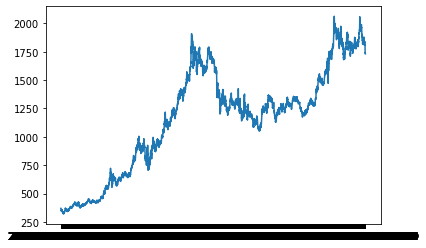

In [25]:
plt.plot(df[df['name']=='Gold']['timestamp'], df[df['name']=='Gold']['value'])
plt.show()

plotly graphs will not be visible on Github, please try to open on Google Colab

In [45]:
fig = px.line(df, x = "timestamp", y="value",
             color='name',
             #histfunc='avg',
             height=500)
fig.show()